# Lab 6
Yash Parakh, Jimmy Phan, Matthew Prinz

## Problem 1: Stop-and-Frisk

In [6]:
from google.colab import files
uploaded = files.upload()

Saving NYC_stop_and_frisk.dat to NYC_stop_and_frisk.dat


In [7]:
#1 Download and parse data 
import numpy as np
import pandas as pd

data = [[int(i) for i in example.split(" ")] for example in uploaded['NYC_stop_and_frisk.dat'].decode('utf-8').split('\r\n')[7:-1]]
data = np.array(data)
df = pd.DataFrame(data={'stops': data[:,0], 'pop': data[:,1], 'past_arrests': data[:,2], 'precinct': data[:,3], 'eth': data[:,4], 'crime': data[:,5]})
df.head(13)

,stops,pop,past_arrests,precinct,eth,crime
0,75,1720,191,1,1,1
1,36,1720,57,1,1,2
2,74,1720,599,1,1,3
3,17,1720,133,1,1,4
4,37,1368,62,1,2,1
5,39,1368,27,1,2,2
6,23,1368,149,1,2,3
7,3,1368,57,1,2,4
8,26,23854,135,1,3,1
9,32,23854,16,1,3,2


In [8]:
#2 
total_pop_black = 0
total_pop_hispanic = 0
total_pop_white = 0
for i, population in enumerate(df['pop']):
    if df['eth'][i] == 1:
        total_pop_black += population
    elif df['eth'][i] == 2:
        total_pop_hispanic += population
    elif df['eth'][i] == 3:
        total_pop_white += population
total_pop_white /= 4
total_pop_hispanic /= 4
total_pop_black /= 4

total_stops_black = 0
total_stops_hispanic = 0
total_stops_white = 0
for i, pop_stops in enumerate(df['stops']):
    if df['eth'][i] == 1:
        total_stops_black += pop_stops
    elif df['eth'][i] == 2:
        total_stops_hispanic += pop_stops
    elif df['eth'][i] == 3:
        total_stops_white += pop_stops

total_pop = total_pop_black + total_pop_hispanic + total_pop_white
total_stops = total_stops_black + total_stops_hispanic + total_stops_white
print(f'The fraction of stops of black people is: {total_stops_black/total_stops}. The fraction of black people in the population is: {total_pop_black/total_pop}.')
print(f'The fraction of stops of hispanic people is: {total_stops_hispanic/total_stops}. The fraction of hispanic people in the population is: {total_pop_hispanic/total_pop}.')
print(f'The fraction of stops of white people is: {total_stops_white/total_stops}. The fraction of white people in the population is: {total_pop_white/total_pop}.')


The fraction of stops of black people is: 0.5312966063004109. The fraction of black people in the population is: 0.27546911368656585.
The fraction of stops of hispanic people is: 0.3395449703241516. The fraction of hispanic people in the population is: 0.2557414035070107.
The fraction of stops of white people is: 0.12915842337543754. The fraction of white people in the population is: 0.46878948280642346.


In [9]:
#3

from statsmodels.discrete.discrete_model import Poisson
from statsmodels.tools import add_constant

exog = df['eth'].to_numpy()
exposure = (df['past_arrests'].to_numpy())+1
endog = df['stops'].to_numpy()

model = Poisson(endog=endog, exog=add_constant(exog), exposure=exposure)
model_results = model.fit()
model_results.summary()

Optimization terminated successfully.
         Current function value: 104.702752
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                  900
Model:                        Poisson   Df Residuals:                      898
Method:                           MLE   Df Model:                            1
Date:                Thu, 17 Oct 2019   Pseudo R-squ.:               0.0007457
Time:                        00:09:42   Log-Likelihood:                -94232.
converged:                       True   LL-Null:                       -94303.
Covariance Type:            nonrobust   LLR p-value:                 1.926e-32
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5193      0.007    -77.871      0.000      -0.532      -0.506
x1            -0.0449      0.004    -11.810      0.000      -0.052      -0.037
==============================================================================
"""

In [10]:
#4
# Baseline ethnic group chosen is white.
predicted_stops_black = model.predict([-0.05193, -0.0449], exog=add_constant([1]), exposure=(df['past_arrests'].to_numpy())+1)
predicted_stops_hispanic = model.predict([-0.05193, -0.0449], exog=add_constant([2]), exposure=(df['past_arrests'].to_numpy())+1)
predicted_stops_white = model.predict([-0.05193, -0.0449], exog=add_constant([3]), exposure=(df['past_arrests'].to_numpy())+1)
frequency_blacks = (predicted_stops_black/predicted_stops_white)[0]
frequency_hispanics = (predicted_stops_hispanic/predicted_stops_white)[0]

print(f"In proportion to arrest rates of the previous year, blacks are stopped {frequency_blacks} times more than whites, and hispanics are stopped {frequency_hispanics} times more than whites.")

In proportion to arrest rates of the previous year, blacks are stopped 1.1094451217254715 times more than whites, and hispanics are stopped 1.0533020087920986 times more than whites.


In [11]:
#5
exog = pd.DataFrame({'eth': df['eth'], 'precinct': df['precinct']})
exposure = (df['past_arrests'].to_numpy())+1
endog = df['stops'].to_numpy()

model = Poisson(endog=endog, exog=add_constant(exog), exposure=exposure)
model_results = model.fit()
model_results.summary()

Optimization terminated successfully.
         Current function value: 99.440732
         Iterations 6


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                  900
Model:                        Poisson   Df Residuals:                      897
Method:                           MLE   Df Model:                            2
Date:                Thu, 17 Oct 2019   Pseudo R-squ.:                 0.05096
Time:                        00:09:42   Log-Likelihood:                -89497.
converged:                       True   LL-Null:                       -94303.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0099      0.008   -119.055      0.000      -1.027      -0.993
eth           -0.0442      0.004    -11.706      0.000      -0.052      -0.037
precinct       0.0130      0.000     97.447      0.000       0.013       0.013
==============================================================================
"""

In [12]:
#6
# Baseline ethnic group chosen is white.

predicted_stops_black = model.predict([-1.0099, -0.0442, 0.0130], exog=add_constant([1]), exposure=(df['past_arrests'].to_numpy())+1)
predicted_stops_hispanic = model.predict([-1.0099, -0.0442, 0.0130], exog=add_constant([2]), exposure=(df['past_arrests'].to_numpy())+1)
predicted_stops_white = model.predict([-1.0099, -0.0442, 0.0130], exog=add_constant([3]), exposure=(df['past_arrests'].to_numpy())+1)
frequency_blacks = (predicted_stops_black/predicted_stops_white)[0]
frequency_hispanics = (predicted_stops_hispanic/predicted_stops_white)[0]
print(f"In proportion to arrest rates of the previous year, blacks are stopped {frequency_blacks} more than whites and hispanics are stopped {frequency_hispanics} more than whites")

In proportion to arrest rates of the previous year, blacks are stopped 7.536817419431639 more than whites and hispanics are stopped 2.7453264686429626 more than whites


## Problem 2: NBA Player Salaries

In [13]:
import pandas as pd
from io import BytesIO
import matplotlib.pyplot as plt

# df = pd.read_csv(BytesIO(uploaded['nba_cc_fake_data.csv']), sep=',', header=0, index_col=0, dtype=np.int32)
df = pd.read_csv('nba_cc_fake_data.csv', sep=',', header=0, index_col=0, dtype=np.int32)
df.head()

,Comp,Height,Points,Salary
0,9,76,27,0
1,7,78,39,0
2,9,76,39,0
3,9,74,39,0
4,9,74,26,0


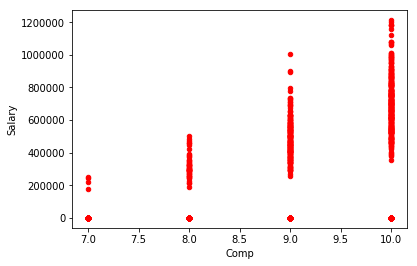

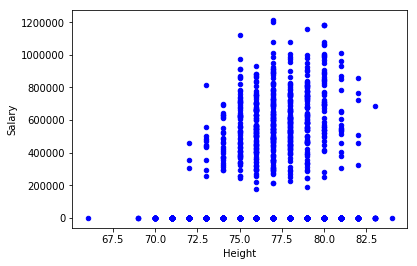

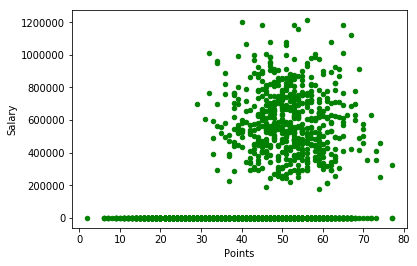

In [14]:
#1

# three scatter plots comparing competitiveness, height, and points to salary
df.plot(kind='scatter', x='Comp', y='Salary', color='red')
df.plot(kind='scatter', x='Height', y='Salary', color='blue')
df.plot(kind='scatter', x='Points', y='Salary', color='green')
plt.show()

Linear regression is not a good fit because a very small fraction of all the players have a NBA salary. As a result and as can be seen from the graphs above, a lot of the salary values are non-existent.

In [15]:
#2

# Attempt to fit OLS to the NBA data
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

train, test = train_test_split(df, test_size=0.20)
train = np.array(train)
test = np.array(test)
reg = linear_model.LinearRegression().fit(train[:,:-1], train[:,-1])

y_hat = reg.predict(test[:,:-1])
print(mean_squared_error(test[:,-1], y_hat))

17810994017.989952


The test error is extremely high. OLS doesn't do very well.

In [39]:
#3
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.special import expit
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score

# create target showing if player made it to nba
num_players = df.shape[0]
target = []

# 0 for not in nba, 1 for making it to nba
for salary in df['Salary']:
  if(salary == 0):
      target.append(0)
  else:
      target.append(1)
      
target = np.array(target)

# split data
X = df.iloc[:, :-1]
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2)

# fit logistic model to find probability of making it to nba
lr = LogisticRegressionCV(cv=5).fit(X_train, y_train)

beta_hat = lr.coef_
prob = expit(np.matmul(np.array(X_train), beta_hat.T)+lr.intercept_)

# predict if player makes nba 
y_hat = lr.predict(X_test)

# find AUC      
print("Probability of making it to nba for test set:")
print(prob)
auc = roc_auc_score(y_test, y_hat)
print("\nAUC is ", auc)


# build composite model
X = np.array(X)
salary = np.array(df['Salary'])
made_nba_X = []
made_nba_salary = []

for i in range(num_players):
  if(target[i] == 1):
    made_nba_X.append(X[i])
    made_nba_salary.append(salary[i])

made_nba_X = np.array(made_nba_X)
made_nba_salary = np.array(made_nba_salary)

# find expected salary conditioned on making it to the nba
linearR = LinearRegression(fit_intercept=True).fit(made_nba_X, made_nba_salary)

# find expected salary with probability of making it to the nba
predicted_salary = []
probabilities = expit(np.matmul(X, beta_hat.T) + lr.intercept_)
probabilities.reshape(num_players)

for i in range(num_players):
  pred_sal = probabilities[i]*(np.matmul(X[i], linearR.coef_.T) + linearR.intercept_)
  # print(pred_sal)
  if (pred_sal < 0):
    pred_sal = 0                              
                            
  predicted_salary.append(pred_sal)
  
print("\npredicted salaries for first 20 players")
for i in range(20):
  print(predicted_salary[i])
  
# find r^2 score of predicted salaries
r2 = r2_score(salary, predicted_salary)
print("\nr2 score is ", r2)

# predict salary for given basketball player
player = [9, 78, 46]
prob_make_nba = expit(np.matmul(np.array(player), beta_hat.T) + lr.intercept_)
pred_salary = probabilities[i]*(np.matmul(np.array(player), linearR.coef_) + linearR.intercept_)
print("The predicted salary for this player is ", pred_salary[0])

Probability of making it to nba for test set:
[[7.33946568e-01]
 [3.92132781e-04]
 [3.63106479e-03]
 ...
 [7.71651047e-04]
 [2.51210103e-04]
 [7.14904786e-02]]

AUC is  0.6804989674610705

predicted salaries for first 20 players
[369.48439228]
[12.1862849]
[4096.6563295]
[1220.24141015]
[85.19898027]
[533.58246402]
[407.73171308]
[5.09651781]
[4980.16357424]
[417498.70419389]
[110556.23944759]
0
0
[567.06723651]
[277.52264941]
[7376.77493919]
0
[142.86631584]
[1006.48918088]
[63460.57105088]

r2 score is  0.4788398874669083
The predicted salary for this player is  49331.294437625715


## Problem 3: Poisson Regression

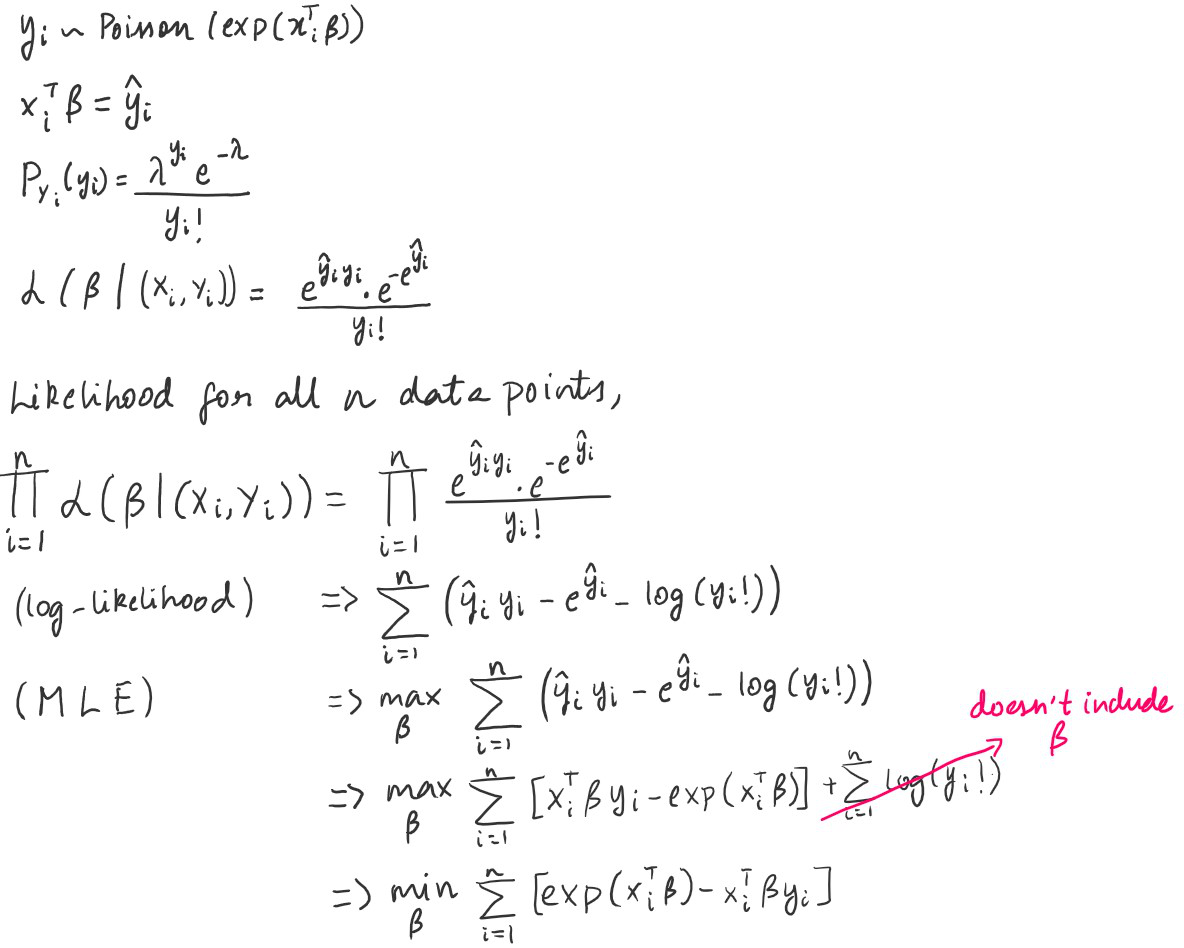

In [0]:
from PIL import Image
from IPython.display import display
im = Image.open("Problem3.jpg")
display(im)